In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Prompt Optimization for Multimodal Prompts

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/prompt_optimizer/vertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb">
<img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fprompts%2Fprompt_optimizer%2Fvertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/prompts/prompt_optimizer/vertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/prompt_optimizer/vertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/prompt_optimizer/vertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/prompt_optimizer/vertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb" target="_blank">
<img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/prompt_optimizer/vertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb" target="_blank">
<img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/prompt_optimizer/vertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb" target="_blank">
<img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/prompt_optimizer/vertex_ai_prompt_optimizer_sdk_multimodal_image.ipynb" target="_blank">
<img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
| Author(s) |  [Raj Sinha](https://github.com/raj-sinha) |

## Overview

When developing Generative AI (Gen AI) applications, prompt engineering poses challenges due to its time-consuming and error-prone nature. Significant effort is involved when crafting and inputting prompts to achieve successful task completion. With the frequent release of foundational models, you face the added burden of migrating working prompts from one model version to another.

Vertex AI prompt optimizer aims to alleviate these challenges by providing you with an intelligent prompt optimization tool. With this tool you can both translate and optimize system instruction in the prompts and the best demonstrations (examples) for prompt templates, empowering you to shape LLM responses from any source model to a target Google model.

Vertex AI prompt optimizer currently supports the following modalities: text, image, video. Audio support is forthcoming.

## Objective

This notebook demonstrates how to leverage Vertex AI prompt optimizer to optimize a simple multimodal prompt for a Gemini model with respect to a question-answering task. The goal is to use Vertex AI prompt optimizer to find the new multimodal prompt template that generates the most accurate and grounded responses.

This tutorial uses the following Google Cloud ML services and resources:

Generative AI on Vertex AI
Vertex AI prompt optimizer
Vertex AI Gen AI evaluation
Vertex AI Custom job
The steps performed include:

Define the prompt template you want to optimize.
Prepare the prompt optimization dataset.
Set target model and evaluation metric.
Set optimization mode and steps.
Run the automatic prompt optimization job.
Collect the best prompt template and evaluation metric.
Validate the best prompt template.

### Dataset

The dataset that is used is the [MathVista dataset](https://mathvista.github.io/).

```
@inproceedings{lu2024mathvista,
  author = {Lu, Pan and Bansal, Hritik and Xia, Tony and Liu, Jiacheng and Li, Chunyuan and Hajishirzi, Hannaneh and Cheng, Hao and Chang, Kai-Wei and Galley, Michel and Gao, Jianfeng},
  title = {MathVista: Evaluating Mathematical Reasoning of Foundation Models in Visual Contexts},
  booktitle = {International Conference on Learning Representations (ICLR)},
  year = {2024}
}```

One sample of this dataset looks like:

<code>
{"query": "Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end.\nQuestion: As shown in the figure, CD is the diameter of \u2299O, chord DE \u2225 OA, if the degree of \u2220D is 50.0, then the degree of \u2220C is ()\nChoices:\n(A) 25\u00b0\n(B) 30\u00b0\n(C) 40\u00b0\n(D) 50\u00b0", "image": "gs://bucket/path/to/math_vista/images/643.jpg", "target": "25\u00b0"}
</code>

The above sample reads as:
<p>
<html>
<b>Query:</b>

<i>Hint:</i> Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end.

<i>Question:</i> As shown in the figure, CD is the diameter of &#x2299; O, chord DE &#x2225; OA, if the degree of &#x2220; D is 50.0, then the degree of &#x2220; C is ()

<i>Choices:</i>
(A) 25 &deg;
(B) 30 &deg;
(C) 40 &deg;
(D) 50 &deg;
</html>

<b>Image:</b>
gs://bucket/path/to/math_vista/images/643.jpg

<b>Target:</b>
25 &deg;

The image in the above sample is:

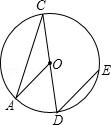

**Preparation**

You should prepare your multimodal dataset in JSONL format, where each sample has the format shown above.

## Costs

This tutorial uses billable components of Google Cloud:

- Vertex AI
- Cloud Storage

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and [Cloud Storage pricing](https://cloud.google.com/storage/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Get started

### Install Vertex AI SDK and other required packages


In [ ]:
%pip install --upgrade --quiet 'google-cloud-aiplatform[evaluation]'
%pip install --upgrade --quiet 'plotly' 'asyncio' 'tqdm' 'tenacity' 'etils' 'importlib_resources' 'fsspec' 'gcsfs' 'nbformat>=4.2.0'

In [ ]:
! mkdir -p ./tutorial/utils && wget https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/prompts/prompt_optimizer/vapo_lib.py -P ./tutorial/utils

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. In Colab or Colab Enterprise, you might see an error message that says "Your session crashed for an unknown reason." This is expected. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
# Use the environment variable if the user doesn't provide Project ID.
import os

import vertexai

PROJECT_ID = (
    ""  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
)
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

REGION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

BUCKET_NAME = ""  # @param {type:"string"}
BUCKET_URI = f"gs://{BUCKET_NAME}"

vertexai.init(project=PROJECT_ID, location=REGION, staging_bucket=BUCKET_URI)

### Create a Cloud Storage bucket

Create a storage bucket to store intermediate artifacts such as datasets and tuning results.

In [ ]:
!gsutil mb -l {REGION} -p {PROJECT_ID} {BUCKET_URI}

### Service Account and permissions

Vertex AI Automated Prompt Design requires a service account with the following permissions:

-   `Vertex AI User` to call Vertex LLM API
-   `Storage Object Admin` to read and write to your GCS bucket.
-   `Artifact Registry Reader` to download the pipeline template from Artifact Registry.

[Check out the documentation](https://cloud.google.com/iam/docs/manage-access-service-accounts#iam-view-access-sa-gcloud) to learn how to grant those permissions to a single service account.

> If you run following commands using Vertex AI Workbench, run directly in the terminal.


In [ ]:
PROJECT_NUMBER = !gcloud projects describe {PROJECT_ID} --format="get(projectNumber)"[0]
PROJECT_NUMBER = PROJECT_NUMBER[0]

In [ ]:
SERVICE_ACCOUNT = f"{PROJECT_NUMBER}-compute@developer.gserviceaccount.com"

In [ ]:
for role in ['aiplatform.user', 'storage.objectAdmin', 'artifactregistry.reader']:

    ! gcloud projects add-iam-policy-binding {PROJECT_ID} \
      --member=serviceAccount:{SERVICE_ACCOUNT} \
      --role=roles/{role} --condition=None

### Set tutorial folder and workspace

Set a local folder to collect and organize data and any tutorial artifacts.

In [ ]:
from pathlib import Path as path

ROOT_PATH = path.cwd()
TUTORIAL_PATH = ROOT_PATH / "tutorial"
TUTORIAL_PATH.mkdir(parents=True, exist_ok=True)

Set an associated workspace to store prompt optimization results on Cloud Storage bucket.

In [ ]:
from etils import epath

WORKSPACE_URI = epath.Path(BUCKET_URI) / "optimization"
INPUT_DATA_URI = epath.Path(WORKSPACE_URI) / "data"

WORKSPACE_URI.mkdir(parents=True, exist_ok=True)
INPUT_DATA_URI.mkdir(parents=True, exist_ok=True)

### Import libraries

Import required libraries.

In [ ]:
# Tutorial
from argparse import Namespace
import json

# General
import logging
from typing import Final
import warnings

from IPython.display import HTML, display
from google.cloud import aiplatform
import pandas as pd
from sklearn.model_selection import train_test_split
from tutorial.utils import vapo_lib

### Libraries logging

Configure logging for libraries to display output within the notebook.

In [ ]:
warnings.filterwarnings("ignore")
logging.getLogger("urllib3.connectionpool").setLevel(logging.ERROR)

### Define constants

Define some tutorial constants.

In [ ]:
INPUT_DATA_FILE_URI = (
    "gs://github-repo/prompts/prompt_optimizer/mathvista_dataset/mathvista_input.jsonl"
)
INPUT_DATA_IMAGES_URI = (
    "gs://github-repo/prompts/prompt_optimizer/mathvista_dataset/images"
)

EXPERIMENT_NAME = "mathvista-multimodal-prompt-eval"
INPUT_OPTIMIZATION_DATA_URI = epath.Path(WORKSPACE_URI) / "prompt_optimization_data"
INPUT_OPTIMIZATION_DATA_FILE_URI = str(
    INPUT_DATA_URI / "prompt_optimization_dataset.jsonl"
)
OUTPUT_OPTIMIZATION_DATA_URI = epath.Path(WORKSPACE_URI) / "optimization_jobs"
APD_CONTAINER_URI: Final[str] = (
    "us-docker.pkg.dev/vertex-ai-restricted/builtin-algorithm/apd:preview_v1_0"
)
CONFIG_FILE_URI = str(WORKSPACE_URI / "config" / "config.json")

### Initialize Vertex AI SDK for Python

Initialize the Vertex AI SDK for Python for your project.

In [ ]:
aiplatform.init(project=PROJECT_ID, location=REGION, staging_bucket=BUCKET_URI)

## 3. Automated prompt design with Vertex AI prompt optimizer

### Load the dataset

Load the MathVista dataset from a Google Cloud Storage bucket. The dataset contains the following columns:

*   `query`: The multiple-choice math question along with a hint and the choices.
*   `image`: Relevant image to answer the question.
*   `target`: The ground truth answer—the correct response that the user expects from the AI assistant.

In [ ]:
prompt_optimization_df = pd.read_json(INPUT_DATA_FILE_URI, lines=True)

In [ ]:
prompt_optimization_df.head()

Print an example of the MathVista dataset.  

In [ ]:
vapo_lib.print_df_rows(prompt_optimization_df, n=1)

### Evaluate the system instruction in the original prompt template

Assess the original prompt's effectiveness for the MathVista Dataset task using Vertex AI's Gen AI Evaluation service. This service offers various metrics and methods to evaluate generative models, which enables comparing the model's performance against our own expectations and criteria.

Specifically, you focus on the correctness of the answers generated in response to the prompt using a test dataset.

To learn more, see [Gen AI evaluation service overview](https://cloud.google.com/vertex-ai/generative-ai/docs/models/evaluation-overview).  


In [ ]:
train_prompt_optimization_df, test_prompt_optimization_df = train_test_split(
    prompt_optimization_df, test_size=0.8, random_state=8
)

#### Upload samples to bucket

Once you prepare your prompt optimization dataset, you can upload them on Cloud Storage bucket.

In [ ]:
train_prompt_optimization_df.to_json(
    INPUT_OPTIMIZATION_DATA_FILE_URI, orient="records", lines=True
)

In [ ]:
SYSTEM_INSTRUCTION_TEMPLATE = """
Solve the problem given the image.
"""

PROMPT_TEMPLATE = """
Problem: {{query}}
Image: {{image}} @@@image/jpeg
Answer: {{target}}
"""

#### To evaluate the prompt template, follow the method outlined in other notebooks such as [gemini/evaluation/evaluate_multimodal_task_image.ipynb](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/evaluation/evaluate_multimodal_task_image.ipynb)

#### Configure optimization settings

Vertex AI prompt optimizer lets you control the optimization process by specifying what to optimize (instructions only, demonstrations only, or both), providing a system instruction and prompt template, and selecting the target model.  You can optionally refine the optimization with some advanced settings like its duration and the number of optimization iterations it runs, which models the Vertex AI prompt optimizer uses, and other parameters to control the structure and content of prompts.

Below are some common and recommended default configurations. For more advanced control, you can learn and explore more about all the parameters and how to best use them in the [detailed documentation](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/prompts/prompt-optimizer).


In [ ]:
PROMPT_OPTIMIZATION_JOB = "auto-multimodal-prompt-design-job-" + vapo_lib.get_id()
OUTPUT_OPTIMIZATION_RUN_URI = str(
    OUTPUT_OPTIMIZATION_DATA_URI / PROMPT_OPTIMIZATION_JOB
)

args = Namespace(
    # Basic configuration
    system_instruction=SYSTEM_INSTRUCTION_TEMPLATE,  # System instructions for the target model. String.
    prompt_template=PROMPT_TEMPLATE,  # Template for prompts,  String.
    demo_and_query_template=PROMPT_TEMPLATE,
    target_model="gemini-2.0-flash-001",  # Target model for optimization. String. Supported models: "gemini-2.0-flash-lite-001", "gemini-2.0-flash-001", "gemini-1.5-flash-002", "gemini-1.5-pro-002", "gemini-1.5-flash-001", "gemini-1.5-pro-001", "gemini-1.0-pro-001", "gemini-1.0-pro-002", "gemini-1.0-ultra-001", "text-bison@001", "text-bison@002", "text-bison32k@002", "text-unicorn@001"
    optimization_mode="instruction",  # Optimization mode. String. Supported modes: "instruction", "demonstration", "instruction_and_demo"
    eval_metrics_types=[
        "question_answering_correctness",
    ],  # List of evaluation metrics. List of strings. Supported metrics: "bleu", "coherence", "comet", "exact_match", "fluency", "groundedness", "metricx", "rouge_1", "rouge_2", "rouge_l", "rouge_l_sum", "safety", "question_answering_correctness", "question_answering_quality", "summarization_quality", "text_quality", "verbosity", "tool_call_valid", "tool_name_match", "tool_parameter_key_match", "tool_parameter_kv_match"
    eval_metrics_weights=[
        1.0,
    ],  # Weights for evaluation metrics. List of floats.  Length must match eval_metrics_types.  Should sum to 1.
    aggregation_type="weighted_sum",  # Aggregation type for evaluation metrics. String. Supported aggregation types: "weighted_sum", "weighted_average"
    input_data_path=INPUT_OPTIMIZATION_DATA_FILE_URI,  # Cloud Storage URI to input optimization data. String.
    output_path=OUTPUT_OPTIMIZATION_RUN_URI,  # Cloud Storage URI to save optimization results. String.
    project=PROJECT_ID,  # Google Cloud project ID. String.
    # (Optional) Advanced configuration
    num_steps=10,  # Number of iterations in instruction optimization mode. Integer between 10 and 20.
    num_demo_set_candidates=10,  # Number of demonstrations evaluated in instruction and instruction_and_demo mode. Integer between 10 and 30.
    demo_set_size=3,  # Number of demonstrations generated per prompt. Integer between 3 and 6.
    target_model_location="us-central1",  # Location of the target model. String. Default us-central1.
    source_model="",  # Google model that the system instructions and prompts were previously used with. String. Not needed if you provide target column.
    source_model_location="",  # Location of the source model. String. Default us-central1. Not needed if you provide target column.
    target_model_qps=1,  # The queries per second (QPS) sent to the target model. Integer greater or equal than 1 depending on your quota.
    optimizer_model_qps=1,  # The queries per second (QPS) sent to the optimization model. Integer greater or equal than 1 depending on your quota.
    eval_qps=1,  # The queries per second (QPS) sent to the eval model. Integer greater or equal than 1 depending on your quota.
    source_model_qps="",  # The queries per second (QPS) sent to the source model. Integer greater or equal than 1 depending on your quota.
    response_mime_type="text/plain",  # MIME response type that the target model uses. String. Supported response: text/plain, text/x.enum, application/json.
    response_schema="",  # The Vertex AI's Controlled Generation response schema that the target model uses to generate answers. String.
    language="English",  # Language of the system instructions. String. Supported languages: "English", "French", "German", "Hebrew", "Hindi", "Italian", "Japanese", "Korean", "Portuguese", "Simplified Chinese", "Spanish", "Traditional Chinese"
    placeholder_to_content=json.loads(
        "{}"
    ),  # Placeholder to replace any parameter in the system instruction. Dict.
    data_limit=10,  # Amount of data used for validation. Integer between 5 and 100.
    translation_source_field_name="",  # Fill in with the corresponding field name of the source text in the data if translation metrics like Comet or MetricX are selected. Otherwise, leave it as empty.
    has_multimodal_inputs=True,
)

#### Upload Vertex AI prompt optimizer config to Cloud Storage

After define the Vertex AI prompt optimizer configuration, upload them on Cloud Storage bucket.


In [ ]:
args = vars(args)

with epath.Path(CONFIG_FILE_URI).open("w") as config_file:
    json.dump(args, config_file)
config_file.close()

#### Run the automatic prompt optimization job

Now you are ready to run your first Vertex AI prompt optimizer job using the Vertex AI SDK for Python.


> This prompt optimization job requires ~ 40 minutes to run.

> Be sure you have provisioned enough queries per minute (QPM) quota implementing the recommended QPM for each model. If you configure the Vertex AI prompt optimizer with a QPM that is higher than the QPM than you have access to, the job might fail. [Check out](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/prompts/prompt-optimizer#before-you-begin) the documentation to know more.


In [ ]:
WORKER_POOL_SPECS = [
    {
        "machine_spec": {
            "machine_type": "n1-standard-4",
        },
        "replica_count": 1,
        "container_spec": {
            "image_uri": APD_CONTAINER_URI,
            "args": ["--config=" + CONFIG_FILE_URI],
        },
    }
]

custom_job = aiplatform.CustomJob(
    display_name=PROMPT_OPTIMIZATION_JOB,
    worker_pool_specs=WORKER_POOL_SPECS,
)

custom_job.run(service_account=SERVICE_ACCOUNT, sync=False)

### Collect and display the optimization results

Vertex AI prompt optimizer returns both optimized templates and evaluation results for either instruction, or demostrations, or both depending on the optimization mode you define as JSONL files on Cloud Storage bucket. Those results help you understand the optimization process.

In this case, you want to collect the optimized templates and evaluation results for the system instruction.

Below you use a helper function to display those results.

In [ ]:
results_ui = vapo_lib.ResultsUI(OUTPUT_OPTIMIZATION_RUN_URI)
results_df_html = """

"""

display(HTML(results_df_html))
display(results_ui.get_container())

### Examine the new prompt template with the optimized instruction.

#### Generate new responses using the optimized system instruction.

Set the optimized system instruction template you get from Vertex AI prompt optimizer job.

In [ ]:
OPTIMIZED_SYSTEM_INSTRUCTION_TEMPLATE = "Analyze the provided image carefully and extract all relevant information, including labels, measurements, and geometric relationships. Use this extracted information to solve the problem. Solve the problem given the image."  # @param {type:"string"}

Prepare optimized prompts using the optimized system instruction template.

In [ ]:
OPTIMIZED_PROMPT_TEMPLATE = (
    OPTIMIZED_SYSTEM_INSTRUCTION_TEMPLATE
    + "\nProblem: {query}"
    + "\nImage: {image} @@@image/jpeg"
    + "\nAnswer:"
)

optimized_prompts = [
    OPTIMIZED_PROMPT_TEMPLATE.format(query=q, image=i)
    for q, i in zip(
        test_prompt_optimization_df.loc[:, "query"].to_list(),
        test_prompt_optimization_df.loc[:, "image"].to_list(),
    )
]

Leverage Gemini API on Vertex AI to send parallel generation requests.

In [ ]:
gemini_llm = vapo_lib.init_new_model(model_name="gemini-1.5-flash-001")

gemini_predictions = [
    vapo_lib.async_generate(p, model=gemini_llm) for p in optimized_prompts
]

gemini_predictions_col = await tqdm_asyncio.gather(*gemini_predictions)

Prepare the test data and visualize the resulting dataset.

In [ ]:
test_prompt_optimization_df["optimized_prompt_with_vapo"] = optimized_prompts
test_prompt_optimization_df["gemini_answer_with_vapo"] = gemini_predictions_col

In [ ]:
vapo_lib.print_df_rows(test_prompt_optimization_df, n=1)

#### To evaluate the prompt template, follow the method outlined in other notebooks such as [gemini/evaluation/evaluate_multimodal_task_image.ipynb](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/evaluation/evaluate_multimodal_task_image.ipynb)

## 4. Clean up

In [ ]:
delete_bucket = False
delete_job = False
delete_experiment = False
delete_tutorial = False

if delete_bucket:
    ! gsutil rm -r $BUCKET_URI

if delete_job:
    custom_job.delete()

if delete_experiment:
    experiment = aiplatform.Experiment(experiment_name=EXPERIMENT_NAME)
    experiment.delete()

if delete_tutorial:
    import shutil

    shutil.rmtree(str(TUTORIAL_PATH))